In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Earlier having around 5LAC rows, after sampling having around 1.33LAC rows:
df = pd.read_csv("/Users/shailesh/Desktop/00 Python/train_indessa.csv").sample(frac=.10,random_state=0).reset_index()
df = df.drop(["index"],axis=1)
pd.set_option('max_columns',500)
pd.set_option('max_rows',500)
print(df.shape)
df.head()

(53243, 43)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,42802624,5000,5000,5000.0,36 months,BAT4694572,13.66,C,C3,1 year,RENT,43000.0,Source Verified,n,NaN,other,144xx,NY,11.47,0.0,1.0,71.0,NaN,14.0,0.0,1782.0,13.9,17.0,w,553.87,0.0,0.0,0.0,0.0,71.0,INDIVIDUAL,NaN,52th week,0.0,0.0,23756.0,12800.0,0
1,2631928,5800,5800,5800.0,36 months,BAT5547201,14.33,C,C1,2 years,RENT,62550.0,Not Verified,n,> Hi like a lot of people I have too many c...,credit_card,927xx,CA,3.32,1.0,0.0,5.0,NaN,8.0,0.0,4901.0,30.8,20.0,f,267.48,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,4901.0,15900.0,1
2,46576841,6000,6000,6000.0,36 months,NaN,9.99,B,B3,NaN,MORTGAGE,55648.1,Verified,n,NaN,home_improvement,484xx,MI,34.35,2.0,0.0,16.0,116.0,7.0,1.0,4540.0,69.8,18.0,f,441.15,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,44th week,0.0,0.0,284655.0,6500.0,0
3,59712869,16500,16500,16500.0,60 months,BAT1780517,12.29,C,C1,3 years,MORTGAGE,50000.0,Verified,n,NaN,debt_consolidation,350xx,AL,4.08,2.0,0.0,15.0,NaN,13.0,0.0,425.0,7.9,30.0,w,812.92,0.0,0.0,0.0,0.0,32.0,INDIVIDUAL,NaN,22th week,0.0,0.0,233143.0,5400.0,0
4,17842960,29900,29900,29900.0,60 months,BAT2136391,17.57,D,D2,5 years,MORTGAGE,65000.0,Not Verified,n,NaN,debt_consolidation,477xx,IN,30.59,1.0,0.0,4.0,NaN,14.0,0.0,37031.0,75.8,42.0,w,7798.91,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,87th week,0.0,0.0,203017.0,45600.0,0


In [2]:
#Analysing our dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53243 entries, 0 to 53242
Data columns (total 43 columns):
member_id                      53243 non-null int64
loan_amnt                      53243 non-null int64
funded_amnt                    53243 non-null int64
funded_amnt_inv                53243 non-null float64
term                           53243 non-null object
batch_enrolled                 44589 non-null object
int_rate                       53243 non-null float64
grade                          53243 non-null object
sub_grade                      53243 non-null object
emp_length                     50565 non-null object
home_ownership                 53243 non-null object
annual_inc                     53243 non-null float64
verification_status            53243 non-null object
pymnt_plan                     53243 non-null object
desc                           7545 non-null object
purpose                        53243 non-null object
zip_code                       53243 non-nul

In [3]:
#Removing unwanted column from dataset:
df.drop(["member_id", "batch_enrolled"],axis=1,inplace=True)
df.shape

(53243, 41)

In [4]:
'''1.Data Cleaning'''

df["term"].replace(to_replace=" months", value='', regex=True, inplace=True)
df["term"]=pd.to_numeric(df["term"], errors="coerce")

'''
df["sub_grade"].replace(to_replace="A", value=0, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="B", value=1, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="C", value=2, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="D", value=3, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="E", value=4, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="F", value=5, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="G", value=6, regex=True, inplace=True)
df["sub_grade"]=pd.to_numeric(df["sub_grade"], errors="coerce")
'''

df["emp_length"].replace("n/a", 0, inplace=True)
df["emp_length"].replace(to_replace="\+ years", value='', regex=True, inplace=True)
df["emp_length"].replace(to_replace=" years", value='', regex=True, inplace=True)
df["emp_length"].replace(to_replace=" year", value='', regex=True, inplace=True)
df["emp_length"].replace(to_replace="< 1", value= 0, regex=True, inplace=True)
df["emp_length"]=pd.to_numeric(df["emp_length"], errors="coerce")

df["verification_status"].replace(to_replace="Source ",value='',regex=True, inplace=True)

df["zip_code"].replace(to_replace="xx", value='', regex=True, inplace=True)
df["zip_code"]=pd.to_numeric(df["zip_code"], errors="coerce")

df['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
df['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
df['last_week_pay'] = pd.to_numeric(df['last_week_pay'], errors='coerce')

print('Transformation Done')
print(df.shape)
df.head()

Transformation Done
(53243, 41)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,5000,5000,5000.0,36,13.66,C,C3,1.0,RENT,43000.0,Verified,n,NaN,other,144,NY,11.47,0.0,1.0,71.0,NaN,14.0,0.0,1782.0,13.9,17.0,w,553.87,0.0,0.0,0.0,0.0,71.0,INDIVIDUAL,NaN,52.0,0.0,0.0,23756.0,12800.0,0
1,5800,5800,5800.0,36,14.33,C,C1,2.0,RENT,62550.0,Not Verified,n,> Hi like a lot of people I have too many c...,credit_card,927,CA,3.32,1.0,0.0,5.0,NaN,8.0,0.0,4901.0,30.8,20.0,f,267.48,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22.0,0.0,0.0,4901.0,15900.0,1
2,6000,6000,6000.0,36,9.99,B,B3,NaN,MORTGAGE,55648.1,Verified,n,NaN,home_improvement,484,MI,34.35,2.0,0.0,16.0,116.0,7.0,1.0,4540.0,69.8,18.0,f,441.15,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,44.0,0.0,0.0,284655.0,6500.0,0
3,16500,16500,16500.0,60,12.29,C,C1,3.0,MORTGAGE,50000.0,Verified,n,NaN,debt_consolidation,350,AL,4.08,2.0,0.0,15.0,NaN,13.0,0.0,425.0,7.9,30.0,w,812.92,0.0,0.0,0.0,0.0,32.0,INDIVIDUAL,NaN,22.0,0.0,0.0,233143.0,5400.0,0
4,29900,29900,29900.0,60,17.57,D,D2,5.0,MORTGAGE,65000.0,Not Verified,n,NaN,debt_consolidation,477,IN,30.59,1.0,0.0,4.0,NaN,14.0,0.0,37031.0,75.8,42.0,w,7798.91,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,87.0,0.0,0.0,203017.0,45600.0,0


In [6]:
#Checking for null values, it shows percerntage of null values in that column:
null = df.isnull().sum()
null_per = (null/len(df))*100
null_per

loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
grade                           0.000000
sub_grade                       0.000000
emp_length                      5.029769
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
pymnt_plan                      0.000000
desc                           85.829123
purpose                         0.000000
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.000000
inq_last_6mths                  0.000000
mths_since_last_delinq         51.304397
mths_since_last_record         84.788611
open_acc                        0.000000
pub_rec                         0.000000
revol_bal                       0.000000
revol_util      

In [7]:
#Deleting the 4 columns having more than 50% missing values:
df.drop(["desc","mths_since_last_delinq","mths_since_last_record","mths_since_last_major_derog","verification_status_joint"],axis=1,inplace=True)
print(df.shape)

(53243, 36)


In [8]:
#Analysing the remaining columns from our dataset:
pd.set_option('display.float_format', '{:.5f}'.format)
des = df.describe()
print(des)

        loan_amnt  funded_amnt  funded_amnt_inv        term    int_rate  \
count 53243.00000  53243.00000      53243.00000 53243.00000 53243.00000   
mean  14751.33726  14737.61480      14696.46825    43.16083    13.25602   
std    8461.42797   8456.87156       8469.66549    10.98111     4.37002   
min    1000.00000   1000.00000          0.00000    36.00000     5.32000   
25%    8000.00000   8000.00000       8000.00000    36.00000     9.99000   
50%   13000.00000  13000.00000      12975.00000    36.00000    12.99000   
75%   20000.00000  20000.00000      20000.00000    60.00000    16.20000   
max   35000.00000  35000.00000      35000.00000    60.00000    28.99000   

       emp_length    annual_inc    zip_code         dti  delinq_2yrs  \
count 50565.00000   53243.00000 53243.00000 53243.00000  53243.00000   
mean      6.00261   75173.86174   511.55579    18.19773      0.31200   
std       3.66677   71759.29271   313.42476     8.44665      0.85487   
min       0.00000    5000.00000    1

In [9]:
#Below variables are also having more than 50% values as "0" but we can't delete all of them as they may be significant or not:

#"delinq_2yrs", "inq_last_6mths", "pub_rec", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "collections_12_mths_ex_med", "acc_now_delinq", "tot_coll_amt"

In [9]:
#Now checking Mutlicollinearity between variables and removing it using PCA.
#Before applying PCA, MVT and Outlier treatment is required to be performed.

#Selecting numerical variables for outlier detection:
df1 = df._get_numeric_data()
df1.drop(['loan_status'], axis=1, inplace=True)
print(df1.shape)
df1.head()

(53243, 26)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,5000.00000,36,13.66000,1.00000,43000.00000,144,11.47000,0.00000,1.00000,14.00000,0.00000,1782.00000,13.90000,17.00000,553.87000,0.00000,0.00000,0.00000,0.00000,52.00000,0.00000,0.00000,23756.00000,12800.00000
1,5800,5800,5800.00000,36,14.33000,2.00000,62550.00000,927,3.32000,1.00000,0.00000,8.00000,0.00000,4901.00000,30.80000,20.00000,267.48000,0.00000,0.00000,0.00000,0.00000,22.00000,0.00000,0.00000,4901.00000,15900.00000
2,6000,6000,6000.00000,36,9.99000,nan,55648.10000,484,34.35000,2.00000,0.00000,7.00000,1.00000,4540.00000,69.80000,18.00000,441.15000,0.00000,0.00000,0.00000,0.00000,44.00000,0.00000,0.00000,284655.00000,6500.00000
3,16500,16500,16500.00000,60,12.29000,3.00000,50000.00000,350,4.08000,2.00000,0.00000,13.00000,0.00000,425.00000,7.90000,30.00000,812.92000,0.00000,0.00000,0.00000,0.00000,22.00000,0.00000,0.00000,233143.00000,5400.00000
4,29900,29900,29900.00000,60,17.57000,5.00000,65000.00000,477,30.59000,1.00000,0.00000,14.00000,0.00000,37031.00000,75.80000,42.00000,7798.91000,0.00000,0.00000,0.00000,0.00000,87.00000,0.00000,0.00000,203017.00000,45600.00000


In [10]:
#Now checking for skewness for all numeric variables before outlier treatment
#For no skewness, it should range from -1 to +1:

skewness1 = df1.skew()
skewness1

loan_amnt                     0.68719
funded_amnt                   0.68935
funded_amnt_inv               0.68712
term                          0.88140
int_rate                      0.41186
emp_length                   -0.24027
annual_inc                   54.18945
zip_code                      0.05269
dti                           1.70753
delinq_2yrs                   5.59368
inq_last_6mths                1.89170
open_acc                      1.23645
pub_rec                      23.60238
revol_bal                    16.11844
revol_util                   -0.13879
total_acc                     0.87635
total_rec_int                 2.83433
total_rec_late_fee           19.89590
recoveries                   18.73172
collection_recovery_fee      30.83017
collections_12_mths_ex_med   10.92797
last_week_pay                 1.02632
acc_now_delinq               16.54088
tot_coll_amt                 62.05275
tot_cur_bal                   2.84929
total_rev_hi_lim              9.33012
dtype: float

In [11]:
#Outlier Detection:

import numpy as np
#Getting details of each variable:
des1 = df1.describe().round().T
#Setting upper and lower limit:
Q1 = df1.quantile(0.5)
Q3 = df1.quantile(0.95)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
#Checking for outliers:
outlier = np.where((df1<lower_limit)|(df1>upper_limit))
#Additional parameters:
des2 = pd.DataFrame({"IQR":IQR, "LL":lower_limit, "UL":upper_limit, "Skewness":skewness1})
#Creating outlier frame for further analysis:
outlier_frame = pd.concat([des1,des2],axis=1)
outlier_frame

,count,mean,std,min,25%,50%,75%,max,IQR,LL,UL,Skewness
loan_amnt,53243.00000,14751.00000,8461.00000,1000.00000,8000.00000,13000.00000,20000.00000,35000.00000,19000.00000,-15500.00000,60500.00000,0.68719
funded_amnt,53243.00000,14738.00000,8457.00000,1000.00000,8000.00000,13000.00000,20000.00000,35000.00000,19000.00000,-15500.00000,60500.00000,0.68935
funded_amnt_inv,53243.00000,14696.00000,8470.00000,0.00000,8000.00000,12975.00000,20000.00000,35000.00000,19025.00000,-15562.50000,60537.50000,0.68712
term,53243.00000,43.00000,11.00000,36.00000,36.00000,36.00000,60.00000,60.00000,24.00000,0.00000,96.00000,0.88140
int_rate,53243.00000,13.00000,4.00000,5.00000,10.00000,13.00000,16.00000,29.00000,8.00000,0.99000,32.99000,0.41186
emp_length,50565.00000,6.00000,4.00000,0.00000,3.00000,6.00000,10.00000,10.00000,4.00000,0.00000,16.00000,-0.24027
annual_inc,53243.00000,75174.00000,71759.00000,5000.00000,45000.00000,65000.00000,90000.00000,8500021.00000,85000.00000,-62500.00000,277500.00000,54.18945
zip_code,53243.00000,512.00000,313.00000,10.00000,225.00000,476.00000,802.00000,999.00000,480.00000,-244.00000,1676.00000,0.05269
dti,53243.00000,18.00000,8.00000,0.00000,12.00000,18.00000,24.00000,381.00000,15.02000,-4.78000,55.30000,1.70753
delinq_2yrs,53243.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,27.00000,2.00000,-3.00000,5.00000,5.59368


In [12]:
print(pd.qcut(df1["annual_inc"], 10).value_counts(sort=False,dropna=False))

#On applying qcut() we observed that 13,310 people are having salary more than 124,800
#On doing futher analysis using cut(), we found that 40 people were having salary more than 851,708 

(4999.999, 34000.0]      5376
(34000.0, 42000.0]       5744
(42000.0, 50000.0]       6444
(50000.0, 55798.8]       3733
(55798.8, 65000.0]       6833
(65000.0, 72000.0]       3845
(72000.0, 83048.8]       5295
(83048.8, 98000.0]       5378
(98000.0, 125000.0]      5687
(125000.0, 8500021.0]    4908
Name: annual_inc, dtype: int64


In [13]:
print(pd.cut(df1["annual_inc"], bins=10).value_counts(sort=False,dropna=False))

(-3495.021, 854502.1]     53221
(854502.1, 1704004.2]        19
(1704004.2, 2553506.3]        0
(2553506.3, 3403008.4]        1
(3403008.4, 4252510.5]        0
(4252510.5, 5102012.6]        0
(5102012.6, 5951514.7]        0
(5951514.7, 6801016.8]        0
(6801016.8, 7650518.9]        1
(7650518.9, 8500021.0]        1
Name: annual_inc, dtype: int64


In [14]:
#Selecting the desired columns for capping and flooring:
X1 = df1.loc[:,["annual_inc", "pub_rec", "revol_bal", "tot_coll_amt"]]

'''Capping: replacing all values higher than upper limit will be replaced by upper limit itself'''
up = upper_limit[["annual_inc", "pub_rec", "revol_bal", "tot_coll_amt"]]                     #To cap some required values
X11 = np.where(X1>up, up, X1)

'''Flooring means replacing all values less than lower limit will be replaced by lower limit itself'''
#But in our dataset no values are lower than lower limit, so no need of flooring
#X11 = np.where(X1<low, low, X1)

#Converting X11 into a dataframe:
X11 = pd.DataFrame(X11)
#Renaming columns of dataframe "X11":
X11.columns = ["annual_inc", "pub_rec", "revol_bal", "tot_coll_amt" ]

#If capping and flooring all variables:
#up = upper_limit 
#low = lower_limit     
#X11.columns = X1.columns.values

#Updating values in dataframe after outlier detection:
df1.update(X11)

#Checking for skewness after doing outlier detection:
skewness = df1.skew()
print(skewness)

#Note:
#As we can see even after outlier detection, there are variables having large skewness values
#This is because these variables are having Upper Limit(UL) as "0" because 50% values are zero in these variables
#And if we replace these values with UL then these variables will have almost all values as "0".

print("Outlier Detection Done")

loan_amnt                     0.68719
funded_amnt                   0.68935
funded_amnt_inv               0.68712
term                          0.88140
int_rate                      0.41186
emp_length                   -0.24027
annual_inc                    1.93173
zip_code                      0.05269
dti                           1.70753
delinq_2yrs                   5.59368
inq_last_6mths                1.89170
open_acc                      1.23645
pub_rec                       2.76814
revol_bal                     2.40425
revol_util                   -0.13879
total_acc                     0.87635
total_rec_int                 2.83433
total_rec_late_fee           19.89590
recoveries                   18.73172
collection_recovery_fee      30.83017
collections_12_mths_ex_med   10.92797
last_week_pay                 1.02632
acc_now_delinq               16.54088
tot_coll_amt                  4.09327
tot_cur_bal                   2.84929
total_rev_hi_lim              9.33012
dtype: float

In [15]:
'''Missing Value Treatment:'''

#Checking mssing values in each column:
print(df1.isnull().sum())

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
emp_length                    2678
annual_inc                       0
zip_code                         0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      28
total_acc                        0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
collection_recovery_fee          0
collections_12_mths_ex_med       5
last_week_pay                 1048
acc_now_delinq                   0
tot_coll_amt                  4251
tot_cur_bal                   4251
total_rev_hi_lim              4251
dtype: int64


In [16]:
#Replacing missing values using Imputer:

from sklearn.impute import SimpleImputer
import numpy as np
#Columns  are having skewness, so we will use "median" as imputer:
impute = SimpleImputer(missing_values=np.nan, strategy="median")
df1.loc[:,["annual_inc", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "collections_12_mths_ex_med", "acc_now_delinq", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"]] = impute.fit_transform(df1.loc[:,["annual_inc", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "collections_12_mths_ex_med", "acc_now_delinq", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"]])
#Columns  are having no skewness, so we will use "mean" as imputer:
impute = SimpleImputer(missing_values=np.nan, strategy="mean")
df1.loc[:,["emp_length", "revol_util", "total_acc", "last_week_pay",]] = impute.fit_transform(df1.loc[:,["emp_length", "revol_util", "total_acc", "last_week_pay",]])

In [17]:
#Now again checking missing values in each column after MVT:
print("No. of Null values in dataset after MVT:",df1.isnull().sum().sum())
print("Missing Value Treatment Done")

No. of Null values in dataset after MVT: 0
Missing Value Treatment Done


In [16]:
'''*******************************************************************************
             Checking Multi-colinearity and Using PCA for removing it
*******************************************************************************'''

In [18]:
#First checking for numerical variables:
print(df1.shape)
df1.head()

(53243, 26)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,5000.00000,36,13.66000,1.00000,43000.00000,144,11.47000,0.00000,1.00000,14.00000,0.00000,1782.00000,13.90000,17.00000,553.87000,0.00000,0.00000,0.00000,0.00000,52.00000,0.00000,0.00000,23756.00000,12800.00000
1,5800,5800,5800.00000,36,14.33000,2.00000,62550.00000,927,3.32000,1.00000,0.00000,8.00000,0.00000,4901.00000,30.80000,20.00000,267.48000,0.00000,0.00000,0.00000,0.00000,22.00000,0.00000,0.00000,4901.00000,15900.00000
2,6000,6000,6000.00000,36,9.99000,6.00261,55648.10000,484,34.35000,2.00000,0.00000,7.00000,1.00000,4540.00000,69.80000,18.00000,441.15000,0.00000,0.00000,0.00000,0.00000,44.00000,0.00000,0.00000,284655.00000,6500.00000
3,16500,16500,16500.00000,60,12.29000,3.00000,50000.00000,350,4.08000,2.00000,0.00000,13.00000,0.00000,425.00000,7.90000,30.00000,812.92000,0.00000,0.00000,0.00000,0.00000,22.00000,0.00000,0.00000,233143.00000,5400.00000
4,29900,29900,29900.00000,60,17.57000,5.00000,65000.00000,477,30.59000,1.00000,0.00000,14.00000,0.00000,37031.00000,75.80000,42.00000,7798.91000,0.00000,0.00000,0.00000,0.00000,87.00000,0.00000,0.00000,203017.00000,45600.00000


In [19]:
#Standard scaling before doing PCA:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df11 = sc.fit_transform(df1)
df11 = pd.DataFrame(df11)
print(df11.shape)
df11.head()

(53243, 26)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,-1.15246,-1.15145,-1.14486,-0.65211,0.09244,-1.39999,-0.72624,-1.17272,-0.79650,-0.36498,0.30074,0.45399,-0.38999,-0.94667,-1.72794,-0.69881,-0.57372,-0.09400,-0.10502,-0.07131,-0.10721,-0.14327,-0.06676,-0.27410,-0.74773,-0.57638
1,-1.05791,-1.05686,-1.05040,-0.65211,0.24576,-1.12013,-0.26528,1.32551,-1.76139,0.80481,-0.69815,-0.66969,-0.38999,-0.74350,-1.02011,-0.44574,-0.71055,-0.09400,-0.10502,-0.07131,-0.10721,-0.82160,-0.06676,-0.27410,-0.87339,-0.48116
2,-1.03427,-1.03321,-1.02679,-0.65211,-0.74738,-0.00000,-0.42802,-0.08792,1.91229,1.97459,-0.69815,-0.85697,1.76835,-0.76702,0.61333,-0.61446,-0.62758,-0.09400,-0.10502,-0.07131,-0.10721,-0.32416,-0.06676,-0.27410,0.99108,-0.76989
3,0.20666,0.20840,0.21294,1.53348,-0.22106,-0.84028,-0.56119,-0.51546,-1.67141,1.97459,-0.69815,0.26671,-0.38999,-1.03506,-1.97924,0.39782,-0.44995,-0.09400,-0.10502,-0.07131,-0.10721,-0.82160,-0.06676,-0.27410,0.64777,-0.80368
4,1.79034,1.79292,1.79507,1.53348,0.98718,-0.28058,-0.20751,-0.11025,1.46714,0.80481,-0.69815,0.45399,-0.38999,1.34936,0.86463,1.41010,2.88780,-0.09400,-0.10502,-0.07131,-0.10721,0.64812,-0.06676,-0.27410,0.44699,0.43113


In [20]:
#Renaming columns:
df11.columns=df1.columns.values
df11.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,-1.15246,-1.15145,-1.14486,-0.65211,0.09244,-1.39999,-0.72624,-1.17272,-0.79650,-0.36498,0.30074,0.45399,-0.38999,-0.94667,-1.72794,-0.69881,-0.57372,-0.09400,-0.10502,-0.07131,-0.10721,-0.14327,-0.06676,-0.27410,-0.74773,-0.57638
1,-1.05791,-1.05686,-1.05040,-0.65211,0.24576,-1.12013,-0.26528,1.32551,-1.76139,0.80481,-0.69815,-0.66969,-0.38999,-0.74350,-1.02011,-0.44574,-0.71055,-0.09400,-0.10502,-0.07131,-0.10721,-0.82160,-0.06676,-0.27410,-0.87339,-0.48116
2,-1.03427,-1.03321,-1.02679,-0.65211,-0.74738,-0.00000,-0.42802,-0.08792,1.91229,1.97459,-0.69815,-0.85697,1.76835,-0.76702,0.61333,-0.61446,-0.62758,-0.09400,-0.10502,-0.07131,-0.10721,-0.32416,-0.06676,-0.27410,0.99108,-0.76989
3,0.20666,0.20840,0.21294,1.53348,-0.22106,-0.84028,-0.56119,-0.51546,-1.67141,1.97459,-0.69815,0.26671,-0.38999,-1.03506,-1.97924,0.39782,-0.44995,-0.09400,-0.10502,-0.07131,-0.10721,-0.82160,-0.06676,-0.27410,0.64777,-0.80368
4,1.79034,1.79292,1.79507,1.53348,0.98718,-0.28058,-0.20751,-0.11025,1.46714,0.80481,-0.69815,0.45399,-0.38999,1.34936,0.86463,1.41010,2.88780,-0.09400,-0.10502,-0.07131,-0.10721,0.64812,-0.06676,-0.27410,0.44699,0.43113


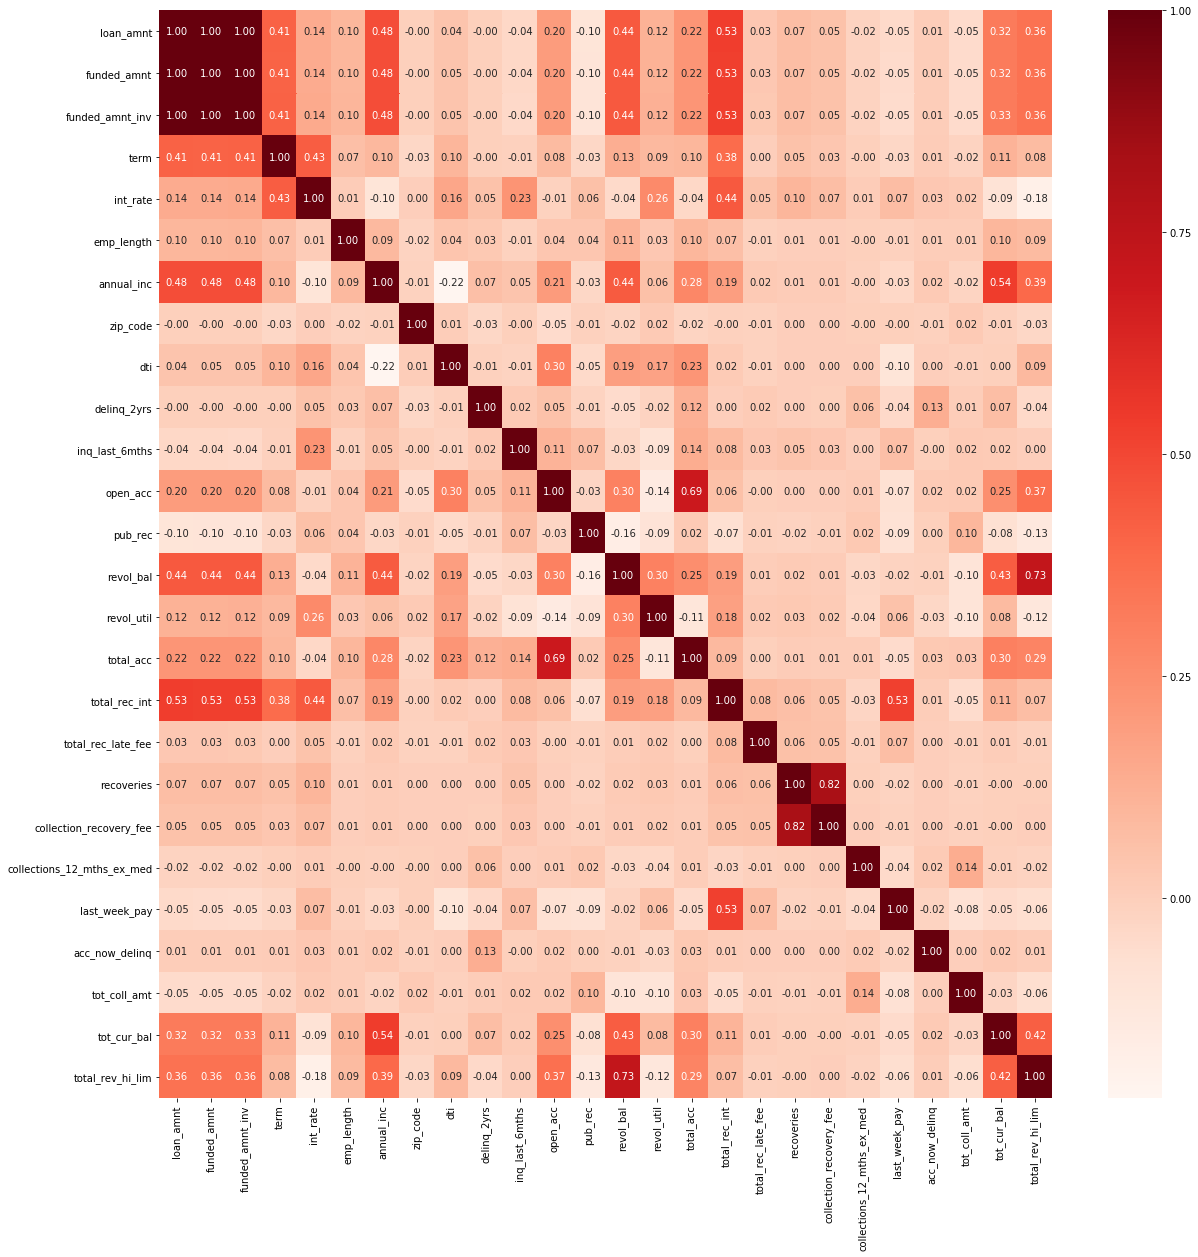

In [23]:
#Ploting multicolinearity between all columns:

import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sb.heatmap(df11.corr(), annot=True, cmap= plt.cm.Reds, fmt='.2f')
plt.show()

In [21]:
#In our model we want to replace all the variables having mulit-colinearity into one vaiable,
#so we don't require elbow method and can do in on step as shown below
'''
#Below columns are having high multi-collinearity between them:
["loan_amnt", "funded_amnt", "funded_amnt_inv"]
["recoveries", "collection_recovery_fee"]
'''

#Now applying PCA on ["loan_amnt", "funded_amnt", "funded_amnt_inv"]:
from sklearn.decomposition.pca import PCA
X = df11.loc[:,["loan_amnt", "funded_amnt", "funded_amnt_inv"]]
df11.drop(["loan_amnt", "funded_amnt", "funded_amnt_inv"], axis=1, inplace=True)
pca = PCA(n_components=1)
X1 = pd.DataFrame(pca.fit_transform(X))
df11["new1"] = X1[0]
pd.options.display.float_format = '{:.2f}'.format
print(df11.shape)
df11.head()

(53243, 24)


,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,new1
0,-0.65,0.09,-1.40,-0.73,-1.17,-0.80,-0.36,0.30,0.45,-0.39,-0.95,-1.73,-0.70,-0.57,-0.09,-0.11,-0.07,-0.11,-0.14,-0.07,-0.27,-0.75,-0.58,-1.99
1,-0.65,0.25,-1.12,-0.27,1.33,-1.76,0.80,-0.70,-0.67,-0.39,-0.74,-1.02,-0.45,-0.71,-0.09,-0.11,-0.07,-0.11,-0.82,-0.07,-0.27,-0.87,-0.48,-1.83
2,-0.65,-0.75,-0.00,-0.43,-0.09,1.91,1.97,-0.70,-0.86,1.77,-0.77,0.61,-0.61,-0.63,-0.09,-0.11,-0.07,-0.11,-0.32,-0.07,-0.27,0.99,-0.77,-1.79
3,1.53,-0.22,-0.84,-0.56,-0.52,-1.67,1.97,-0.70,0.27,-0.39,-1.04,-1.98,0.40,-0.45,-0.09,-0.11,-0.07,-0.11,-0.82,-0.07,-0.27,0.65,-0.80,0.36
4,1.53,0.99,-0.28,-0.21,-0.11,1.47,0.80,-0.70,0.45,-0.39,1.35,0.86,1.41,2.89,-0.09,-0.11,-0.07,-0.11,0.65,-0.07,-0.27,0.45,0.43,3.11


In [22]:
#Now applying PCA on ["recoveries", "collection_recovery_fee"]:
from sklearn.decomposition.pca import PCA
X = df11.loc[:,["recoveries", "collection_recovery_fee"]]
df11.drop(["recoveries", "collection_recovery_fee"], axis=1, inplace=True)
pca = PCA(n_components=1)
X1 = pd.DataFrame(pca.fit_transform(X))
df11["new3"] = X1[0]
pd.options.display.float_format = '{:.2f}'.format
print(df11.shape)
df11.head()

(53243, 23)


,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,new1,new3
0,-0.65,0.09,-1.40,-0.73,-1.17,-0.80,-0.36,0.30,0.45,-0.39,-0.95,-1.73,-0.70,-0.57,-0.09,-0.11,-0.14,-0.07,-0.27,-0.75,-0.58,-1.99,-0.12
1,-0.65,0.25,-1.12,-0.27,1.33,-1.76,0.80,-0.70,-0.67,-0.39,-0.74,-1.02,-0.45,-0.71,-0.09,-0.11,-0.82,-0.07,-0.27,-0.87,-0.48,-1.83,-0.12
2,-0.65,-0.75,-0.00,-0.43,-0.09,1.91,1.97,-0.70,-0.86,1.77,-0.77,0.61,-0.61,-0.63,-0.09,-0.11,-0.32,-0.07,-0.27,0.99,-0.77,-1.79,-0.12
3,1.53,-0.22,-0.84,-0.56,-0.52,-1.67,1.97,-0.70,0.27,-0.39,-1.04,-1.98,0.40,-0.45,-0.09,-0.11,-0.82,-0.07,-0.27,0.65,-0.80,0.36,-0.12
4,1.53,0.99,-0.28,-0.21,-0.11,1.47,0.80,-0.70,0.45,-0.39,1.35,0.86,1.41,2.89,-0.09,-0.11,0.65,-0.07,-0.27,0.45,0.43,3.11,-0.12


In [23]:
#Now checking multicolinearity for categorical variables:

df2 = df.select_dtypes(include=["object"])
print(df2.shape)
df2.head()

(53243, 9)


,grade,sub_grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type
0,C,C3,RENT,Verified,n,other,NY,w,INDIVIDUAL
1,C,C1,RENT,Not Verified,n,credit_card,CA,f,INDIVIDUAL
2,B,B3,MORTGAGE,Verified,n,home_improvement,MI,f,INDIVIDUAL
3,C,C1,MORTGAGE,Verified,n,debt_consolidation,AL,w,INDIVIDUAL
4,D,D2,MORTGAGE,Not Verified,n,debt_consolidation,IN,w,INDIVIDUAL


In [24]:
#Checking Missing values in categorical columns:
print(df2.isnull().sum())

#No missing values

grade                  0
sub_grade              0
home_ownership         0
verification_status    0
pymnt_plan             0
purpose                0
addr_state             0
initial_list_status    0
application_type       0
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


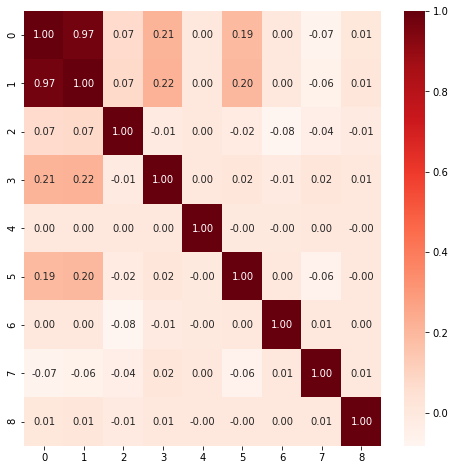

In [28]:
#Using "Spearman rank correlation coefficient" for categorical variables:
from scipy import stats
cor, p = stats.spearmanr(df2) 
#"corr" is correlation and "p" is p-value

#Ploting coefficients to check multi-colinearity: 
plt.figure(figsize=(8,8))
sb.heatmap(cor, annot=True, cmap= plt.cm.Reds, fmt='.2f')
plt.show()

#No categorical variable is having Mutli-colinearity

In [25]:
#"grade" and "sub-grade" are having multi-collineairty becuase they will show same information i.e postion of customer, 
#So we will drop "grade" and take forward only "sub-grade" in our model.

df2.drop(["grade"],axis=1,inplace=True)

In [26]:
#Checking number of categories/classes in each categorical variable:
for i in df2.columns:
    print(i,":",len(df2[i].unique()))

sub_grade : 35
home_ownership : 6
verification_status : 2
pymnt_plan : 2
purpose : 14
addr_state : 51
initial_list_status : 2
application_type : 2


In [27]:
#Combining low frequency classes into one named as "other":
#(series/series.sum()*100) gives percentage of each class
#.lt(1) means less than 1 (It means columns having mask<1, will become True and rest will become False)

#Only taking categories with count almost 1000 or more and rest combined in "Other"
series = pd.value_counts(df2["addr_state"])
mask = (series/series.sum()*100).lt(1.51)    
df2["addr_state"] = np.where(df2["addr_state"].isin(series[mask].index),"Other",df2["addr_state"])
#Now all categories having low frequency are combined in "Other":
print(df2["addr_state"].value_counts().sort_values(ascending=False))

Other    10438
CA        7762
NY        4473
TX        4382
FL        3668
IL        2123
NJ        2098
PA        1861
OH        1809
GA        1720
VA        1515
NC        1486
MI        1313
MD        1240
AZ        1236
MA        1225
WA        1147
CO        1122
MN         965
MO         845
CT         815
Name: addr_state, dtype: int64


In [28]:
#Combining low frequency classes into one named as "other":
#(series/series.sum()*100) gives percentage of each class
#.lt(1) means less than 1 (It means columns having mask<1, will become True and rest will become False)

#Only taking categories with count almost 1000 or more and rest combined in "Other"
series = pd.value_counts(df2["sub_grade"])
mask = (series/series.sum()*100).lt(2.1)    
df2["sub_grade"] = np.where(df2["sub_grade"].isin(series[mask].index),"Other",df2["sub_grade"])
#Now all categories having low frequency are combined in "Other":
print(df2["sub_grade"].value_counts().sort_values(ascending=False))

Other    5932
B3       3317
B4       3290
C1       3244
C2       3193
C3       3057
B2       2939
C4       2898
B5       2883
B1       2695
A5       2614
C5       2477
D1       2211
A4       2084
D2       1811
D3       1605
D4       1548
A3       1401
A2       1378
A1       1372
D5       1294
Name: sub_grade, dtype: int64


In [29]:
#Now checking:
for i in df2.columns:
    print(i,":",len(df2[i].unique()))
    
print(pd.get_dummies(df2,drop_first=True).shape)

sub_grade : 21
home_ownership : 6
verification_status : 2
pymnt_plan : 2
purpose : 14
addr_state : 21
initial_list_status : 2
application_type : 2
(53243, 62)


In [30]:
'''label encoding'''
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lab = LabelEncoder()
df22 = df2.apply(LabelEncoder().fit_transform)
'''one hot encoding'''
onehot = OneHotEncoder(categorical_features=[0,1,2,3,4,5,6,7])
df22 = onehot.fit_transform(df22).toarray()
df22 = pd.DataFrame(df22)
df22.columns = onehot.get_feature_names(['sub_grade', 'home_ownership', 'verification_status', 'pymnt_plan','purpose', 'addr_state', 'initial_list_status', 'application_type'])
'''dummy variable trap'''
df22.drop(["sub_grade_0.0","home_ownership_0.0","purpose_0.0","addr_state_0.0"],axis=1,inplace=True)
df22.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


,sub_grade_1.0,sub_grade_2.0,sub_grade_3.0,sub_grade_4.0,sub_grade_5.0,sub_grade_6.0,sub_grade_7.0,sub_grade_8.0,sub_grade_9.0,sub_grade_10.0,sub_grade_11.0,sub_grade_12.0,sub_grade_13.0,sub_grade_14.0,sub_grade_15.0,sub_grade_16.0,sub_grade_17.0,sub_grade_18.0,sub_grade_19.0,sub_grade_20.0,home_ownership_1.0,home_ownership_2.0,home_ownership_3.0,home_ownership_4.0,home_ownership_5.0,verification_status_0.0,verification_status_1.0,pymnt_plan_0.0,pymnt_plan_1.0,purpose_1.0,purpose_2.0,purpose_3.0,purpose_4.0,purpose_5.0,purpose_6.0,purpose_7.0,purpose_8.0,purpose_9.0,purpose_10.0,purpose_11.0,purpose_12.0,purpose_13.0,addr_state_1.0,addr_state_2.0,addr_state_3.0,addr_state_4.0,addr_state_5.0,addr_state_6.0,addr_state_7.0,addr_state_8.0,addr_state_9.0,addr_state_10.0,addr_state_11.0,addr_state_12.0,addr_state_13.0,addr_state_14.0,addr_state_15.0,addr_state_16.0,addr_state_17.0,addr_state_18.0,addr_state_19.0,addr_state_20.0,initial_list_status_0.0,initial_list_status_1.0,application_type_0.0,application_type_1.0
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00


In [31]:
#Now concatenating numerical and continuous variables::

X = pd.concat([df11,df22],axis=1)
Y = df[['loan_status']]
dfne = pd.concat([X,Y],axis=1)
dfn = dfne
print(dfn.shape)
dfn.head()

(53243, 90)


,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,new1,new3,sub_grade_1.0,sub_grade_2.0,sub_grade_3.0,sub_grade_4.0,sub_grade_5.0,sub_grade_6.0,sub_grade_7.0,sub_grade_8.0,sub_grade_9.0,sub_grade_10.0,sub_grade_11.0,sub_grade_12.0,sub_grade_13.0,sub_grade_14.0,sub_grade_15.0,sub_grade_16.0,sub_grade_17.0,sub_grade_18.0,sub_grade_19.0,sub_grade_20.0,home_ownership_1.0,home_ownership_2.0,home_ownership_3.0,home_ownership_4.0,home_ownership_5.0,verification_status_0.0,verification_status_1.0,pymnt_plan_0.0,pymnt_plan_1.0,purpose_1.0,purpose_2.0,purpose_3.0,purpose_4.0,purpose_5.0,purpose_6.0,purpose_7.0,purpose_8.0,purpose_9.0,purpose_10.0,purpose_11.0,purpose_12.0,purpose_13.0,addr_state_1.0,addr_state_2.0,addr_state_3.0,addr_state_4.0,addr_state_5.0,addr_state_6.0,addr_state_7.0,addr_state_8.0,addr_state_9.0,addr_state_10.0,addr_state_11.0,addr_state_12.0,addr_state_13.0,addr_state_14.0,addr_state_15.0,addr_state_16.0,addr_state_17.0,addr_state_18.0,addr_state_19.0,addr_state_20.0,initial_list_status_0.0,initial_list_status_1.0,application_type_0.0,application_type_1.0,loan_status
0,-0.65,0.09,-1.40,-0.73,-1.17,-0.80,-0.36,0.30,0.45,-0.39,-0.95,-1.73,-0.70,-0.57,-0.09,-0.11,-0.14,-0.07,-0.27,-0.75,-0.58,-1.99,-0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0
1,-0.65,0.25,-1.12,-0.27,1.33,-1.76,0.80,-0.70,-0.67,-0.39,-0.74,-1.02,-0.45,-0.71,-0.09,-0.11,-0.82,-0.07,-0.27,-0.87,-0.48,-1.83,-0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1
2,-0.65,-0.75,-0.00,-0.43,-0.09,1.91,1.97,-0.70,-0.86,1.77,-0.77,0.61,-0.61,-0.63,-0.09,-0.11,-0.32,-0.07,-0.27,0.99,-0.77,-1.79,-0.12,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0
3,1.53,-0.22,-0.84,-0.56,-0.52,-1.67,1.97,-0.70,0.27,-0.39,-1.04,-1.98,0.40,-0.45,-0.09,-0.11,-0.82,-0.07,-0.27,0.65,-0.80,0.36,-0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0
4,1.53,0.99,-0.28,-0.21,-0.11,1.47,0.80,-0.70,0.45,-0.39,1.35,0.86,1.41,2.89,-0.09,-0.11,0.65,-0.07,-0.27,0.45,0.43,3.11,-0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0


In [32]:
'''4.Checking for duplicates'''
df_duplicate = pd.DataFrame(df)[df.duplicated()]
print(df_duplicate.head())
print("No duplicates found")

Empty DataFrame
Columns: [loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, pymnt_plan, purpose, zip_code, addr_state, dti, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, collections_12_mths_ex_med, application_type, last_week_pay, acc_now_delinq, tot_coll_amt, tot_cur_bal, total_rev_hi_lim, loan_status]
Index: []
No duplicates found


In [33]:
X = dfn.iloc[:,:-1]
Y = dfn.iloc[:,-1]

[1.30093521e-02 5.05474841e-02 2.93425213e-02 3.29173017e-02
 3.22778924e-02 4.03487329e-02 1.65000511e-02 2.69526915e-02
 3.16288760e-02 1.25060993e-02 3.24800246e-02 3.60398599e-02
 3.49519423e-02 3.82540476e-02 2.97176966e-03 1.84688428e-03
 8.17232988e-02 9.54848496e-04 1.34158983e-02 4.32369746e-02
 3.71528911e-02 3.62336079e-02 7.16118622e-03 2.90275939e-03
 3.49496424e-03 4.75568004e-03 5.20496513e-03 5.75784906e-03
 6.33699403e-03 6.47246009e-03 7.03281275e-03 6.59841036e-03
 6.76387651e-03 6.96263500e-03 7.08210483e-03 5.10429034e-03
 5.88359112e-03 4.97635134e-03 5.01505172e-03 4.60811394e-03
 3.92360197e-03 3.51105042e-03 5.97146687e-03 1.07572732e-02
 0.00000000e+00 7.95179406e-05 6.15721749e-03 9.98092057e-03
 5.76505642e-03 4.97993901e-03 0.00000000e+00 0.00000000e+00
 8.19884093e-03 1.23259544e-02 4.43043477e-04 5.72584100e-03
 1.49959703e-03 3.19339728e-03 2.12944045e-03 1.39958417e-03
 5.59639311e-03 3.29910728e-04 2.88401704e-03 1.43156728e-03
 1.74121029e-03 8.426135

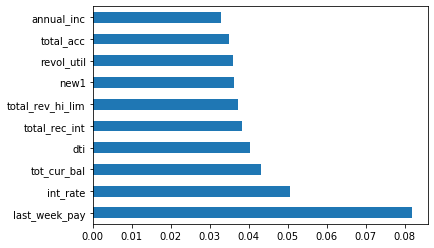

In [34]:
'''Feature Selection'''
#####1.using Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [38]:
'''best 10 significant variables using TreeClassifier:
batch_enrolled, int_rate, annual_inc, dti, revol_util, total_acc, total_rec_int, last_week_pay, tot_cur_bal, total_rev_hi_lim'''
X_n = X.loc[:,["annual_inc","total_acc","revol_util","new1","total_rev_hi_lim","total_rec_int","dti","tot_cur_bal","int_rate","last_week_pay"]]
X_n.head()

,annual_inc,total_acc,revol_util,new1,total_rev_hi_lim,total_rec_int,dti,tot_cur_bal,int_rate,last_week_pay
0,-0.73,-0.70,-1.73,-1.99,-0.58,-0.57,-0.80,-0.75,0.09,-0.14
1,-0.27,-0.45,-1.02,-1.83,-0.48,-0.71,-1.76,-0.87,0.25,-0.82
2,-0.43,-0.61,0.61,-1.79,-0.77,-0.63,1.91,0.99,-0.75,-0.32
3,-0.56,0.40,-1.98,0.36,-0.80,-0.45,-1.67,0.65,-0.22,-0.82
4,-0.21,1.41,0.86,3.11,0.43,2.89,1.47,0.45,0.99,0.65


In [ ]:
'''
*******************************************************************************************************************
*******************************************************************************************************************

        Creating models with six different ML algorithms with their optimal parameters
            
*******************************************************************************************************************
*******************************************************************************************************************
'''

In [48]:
#Split train and test data:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y, test_size=0.20, random_state=0)

In [49]:
'''Logistic Regression:'''

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Selecting the optimal parameters values using GridSearchCV:
params = {"C":[0.1, 1, 10]}
model = GridSearchCV(LogisticRegression(), params, cv=3)
result = model.fit(X_train, Y_train)
#Showing best parameters for this algorithm:
print("Best parameters for Logistic Regression:", result.best_params_)
#Storing the model with best parameters:
classi1 = result.best_estimator_

Best parameters for Logistic Regression: {'C': 0.1}


In [50]:
#As per cross validation best parameter for Logistic Regression:- {'C': 0.1}
#Now predicitng score for this algorithm with best parameters:

Y_pred1 = classi1.predict(X_test)
score1 = classi1.score(X_test, Y_test)
print("Score for Logistic Regression:",score1)

Score for Logistic Regression: 0.7827026011832097


In [51]:
'''Decision Tree'''

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Selecting the optimal parameters values using GridSearchCV:
params = {"max_depth":[5,10,20], "min_samples_split": [5,10,50], "min_samples_leaf": [5,10,50]}
model = GridSearchCV(DecisionTreeClassifier(), params, cv=3)
result = model.fit(X_train, Y_train)
#Showing best parameters for this algorithm:
print("Best parameters for Decision Tree:", result.best_params_)
#Storing the model with best parameters:
classi2 = result.best_estimator_

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 50}


In [52]:
#As per CV best parameters for Decision Tree:- {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 50}
#Now predicitng score for this algorithm with best parameters:

Y_pred2 = classi2.predict(X_test)
score2 = classi2.score(X_test, Y_test)
print("Score for Decision Tree:",score2)

Score for Decision Tree: 0.8199830970044135


In [53]:
'''Random Forest'''

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#Selecting the optimal parameters values using GridSearchCV:
params = {"n_estimators": [100,200,500], "max_depth": [5, 10], "min_samples_split": [10,50], "min_samples_leaf": [10,50]}
model = GridSearchCV(RandomForestClassifier(), params, cv=3)
result = model.fit(X_train, Y_train)
#Showing best parameters for this algorithm:
print("Best parameters for Random Forest:",result.best_params_)
#Storing the model with best parameters:
classi3 = result.best_estimator_

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 200}


In [54]:
#As per CV, best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 200}
#Now predicitng score for this algorithm with best parameters:

Y_Pred3 = classi3.predict(X_test)
score3 = classi3.score(X_test, Y_test)
print("Score for Random Forest:",score3)

Score for Random Forest: 0.8233636961217016


In [55]:
'''Support Vector Machine'''

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Selecting the optimal parameters values using GridSearchCV:
params = {"C":[10, 1, 0.1]}
model = GridSearchCV(SVC(probability=True), params, cv=3)
result = model.fit(X_train, Y_train)
#Showing best parameters for this algorithm:
print("Best parameters for Support Vector Machine:",result.best_params_)
#Storing the model with best parameters:
classi4 = result.best_estimator_

Best parameters for Support Vector Machine: {'C': 1}


In [56]:
#As per CV, best parameters for Support Vector Machine: {'C': 1}
#Now predicitng score for this algorithm with best parameters:

Y_Pred4 = classi4.predict(X_test)
score4 = classi4.score(X_test, Y_test)
print("Score for SVM:",score4)

Score for SVM: 0.7973518640247911


In [60]:
'''GradientBoosting'''

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

#Selecting the optimal parameters values using GridSearchCV:
params = {"n_estimators": [100,200,500], "min_samples_split": [10,50], "min_samples_leaf": [10,50]}
model = GridSearchCV(GradientBoostingClassifier(), params, cv=5)
result = model.fit(X_train, Y_train)
#Showing best parameters for this algorithm:
print("Best parameters for Random Forest:",result.best_params_)
#Storing the model with best parameters:
classi5 = result.best_estimator_

Best parameters for Random Forest: {'min_samples_leaf': 50, 'min_samples_split': 10, 'n_estimators': 500}


In [61]:
#As per CV, best parameters for GradientBoosting: {'min_samples_leaf': 50, 'min_samples_split': 10, 'n_estimators': 500}
#Now predicitng score for this algorithm with best parameters:

Y_pred5 = classi5.predict(X_test)
score5 = classi5.score(X_test, Y_test)
print("Score for GB:",score5)

Score for GB: 0.8410179359564278


In [63]:
'''Neural Network'''

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

#Selecting the optimal parameters values using GridSearchCV:
params = {"hidden_layer_sizes": [(100,),(100,100),(100,100,100)], "alpha": [0.001,0.0001]}
model = GridSearchCV(MLPClassifier(), params, cv=5)
result = model.fit(X_train, Y_train)
#Showing best parameters for this algorithm:
print("Best parameters for NN:",result.best_params_)
#Storing the model with best parameters:
classi6 = result.best_estimator_

Best parameters for NN: {'alpha': 0.0001, 'hidden_layer_sizes': (100,)}


In [64]:
#As per CV, best parameters for Neural Network:- {'alpha': 0.001, 'hidden_layer_sizes': (100,)}
#Now predicitng score for this algorithm with best parameters:

Y_pred6 = classi6.predict(X_test)
score6 = classi6.score(X_test, Y_test)
print("Score for NN:",score6)

Score for NN: 0.8075875669076908


In [65]:
#Comparing accuracy scores of all algorithms:
print("LR:",score1)
print("DT:",score2)
print("RF:",score3)
print("SVM:",score4)
print("GB:",score5)
print("NN:",score6)

LR: 0.7827026011832097
DT: 0.8199830970044135
RF: 0.8233636961217016
SVM: 0.7973518640247911
GB: 0.8410179359564278
NN: 0.8075875669076908


In [66]:
#Plotting AUC/ROC curve for all 6 Algorithms with their optimal parameters:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# For Training models: 
# We have used best estimator and best params from GridSearchCV result instead of fitting models again

# Getting predicted probabilities:
y_score1 = classi1.predict_proba(X_test)[:,1]
y_score2 = classi2.predict_proba(X_test)[:,1]
y_score3 = classi3.predict_proba(X_test)[:,1]
y_score4 = classi4.predict_proba(X_test)[:,1]
y_score5 = classi5.predict_proba(X_test)[:,1]
y_score6 = classi6.predict_proba(X_test)[:,1]

# Ploting Receiving Operating Characteristic Curve
# Creating true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(Y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(Y_test, y_score4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(Y_test, y_score5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(Y_test, y_score6)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(Y_test, y_score1))
print('roc_auc_score for DecisionTree: ', roc_auc_score(Y_test, y_score2))
print('roc_auc_score for Random Forest: ', roc_auc_score(Y_test, y_score3))
print('roc_auc_score for SVC: ', roc_auc_score(Y_test, y_score4))
print('roc_auc_score for GradientBoosting: ', roc_auc_score(Y_test, y_score5))
print('roc_auc_score for Neural Network: ', roc_auc_score(Y_test, y_score6))

roc_auc_score for Logistic Regression:  0.6983264935144512
roc_auc_score for DecisionTree:  0.7480939202204304
roc_auc_score for Random Forest:  0.7820149965399706
roc_auc_score for SVC:  0.6858248461709415
roc_auc_score for GradientBoosting:  0.8543592721246136
roc_auc_score for Neural Network:  0.7509230229811106


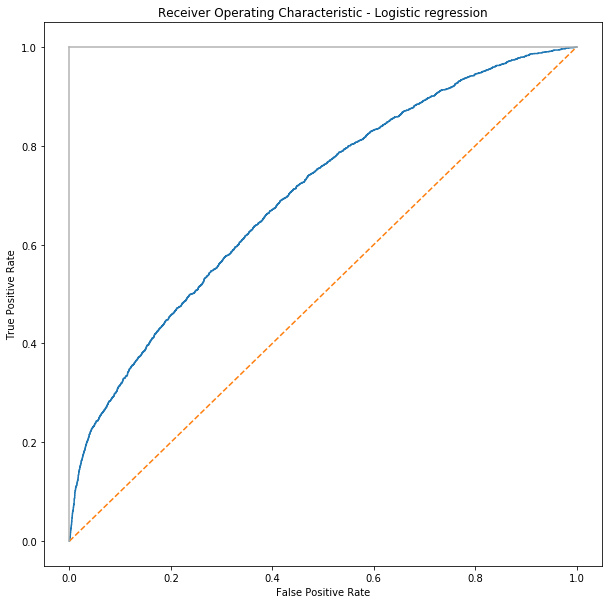

In [68]:
#Ploting AUC/ROC curve for Logistic regression:

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

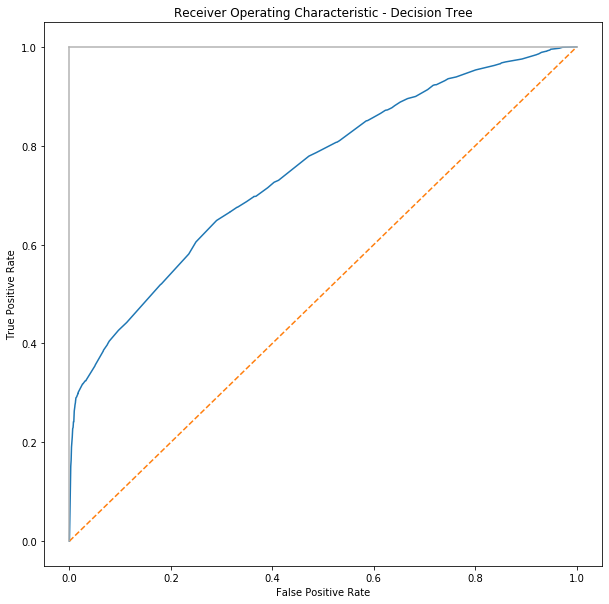

In [69]:
#Ploting AUC/ROC curve for Decision Tree:

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

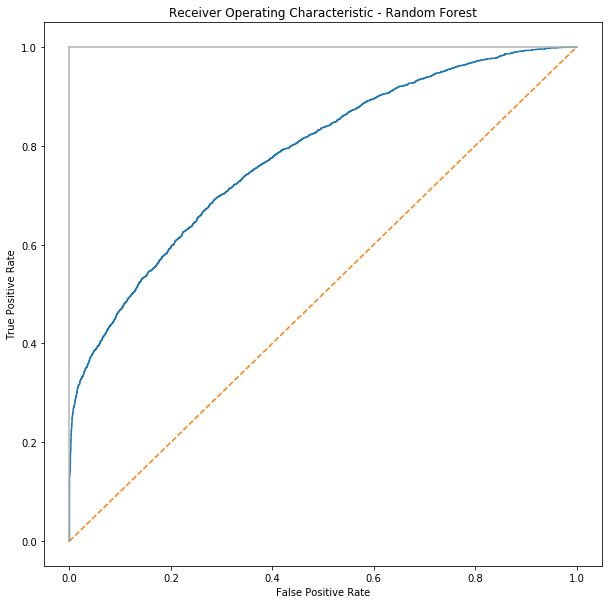

In [70]:
#Ploting AUC/ROC curve for Random Forest:

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

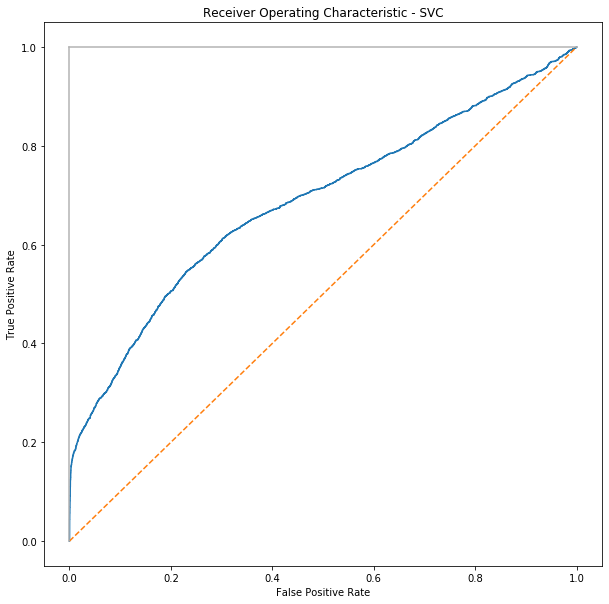

In [71]:
#Ploting AUC/ROC curve for SVC:

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVC')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

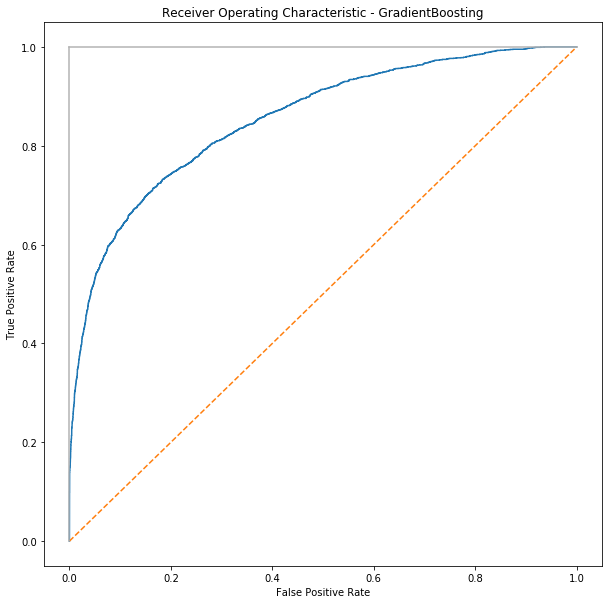

In [72]:
#Ploting AUC/ROC curve for GradientBoosting:

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - GradientBoosting')
plt.plot(false_positive_rate5, true_positive_rate5)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

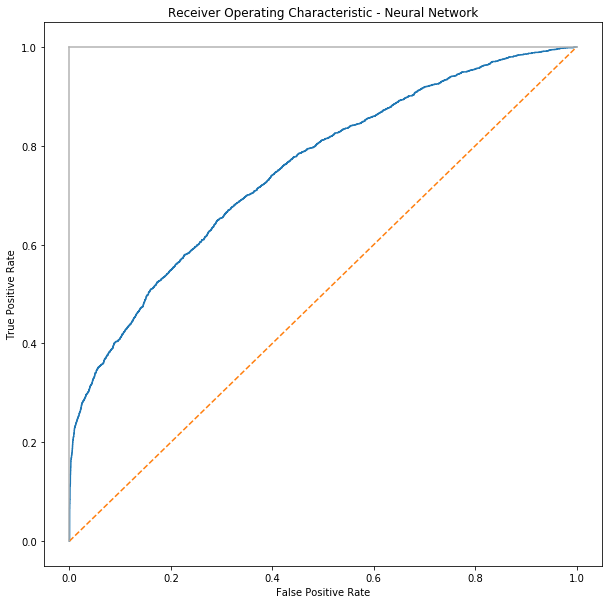

In [73]:
#Ploting AUC/ROC curve for Neural Network:

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Neural Network')
plt.plot(false_positive_rate6, true_positive_rate6)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy Score for PC_Model_DEV: 0.8410179359564278


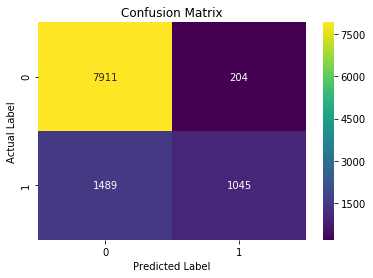

Accuaracy: 0.8410179359564278
Error Rate: 0.15898206404357218
Sensitivity: 0.4123914759273875
Specificity: 0.9748613678373382


In [67]:
'''*******************************************************************************************************************
                 Selecting the best algorithm based on best AUC and creating our model using it       
*******************************************************************************************************************'''

#Gradient Boosting algorithm is having the best AUC (85.4%) than other algorithms
#So using this algorithm, we will create our model and plot confusion matrix 
#Getting accuracy of 84.10%

#classi3 is the classifier for our RandomForest:
classifier = classi5
Y_predict = classifier.predict(X_test)
score = classifier.score(X_test, Y_test)
print("Accuracy Score for PC_Model_DEV:",score)

#Confusion Matrix:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predict)

TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]
TN=cm[0,0]

fig, ax = plt.subplots()
sb.heatmap(pd.DataFrame(cm), annot=True, cmap="viridis", fmt="2g")
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

accuracy = (TP+TN)/(TP+TN+FN+FP)
print("Accuaracy:",accuracy)
error_rate = (FP+FN)/(TP+TN+FN+FP)
print("Error Rate:",error_rate)
sensitivity = TP/(TP+FN)
print("Sensitivity:",sensitivity)
specificity = TN/(TN+FP)
print("Specificity:",specificity)

In [ ]:
#Saving the PC Model for development dataset: 
import pickle
pickle.dump(classifier,open("01_PC_Final_Model_DEV.pkl","wb"))